# 1. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [1]:
# Importing the stuffs we need 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
# Importing the make moons from sklearn dataset
from sklearn.datasets import make_moons

# Make 3k samples
n_samples = 3000

# Create circles
X, y = make_moons(n_samples=n_samples,
                  random_state=42)

# Checking the shape of X and y
print(X.shape, y.shape)

# Packing them into a dataframe
make_moon_df = pd.DataFrame({
    'col_1': X[:, 0],
    'col_2': X[:, 1],
    'label': y
})

make_moon_df.head()

(3000, 2) (3000,)


,col_1,col_2,label
0,0.192464,-0.089818,1
1,-0.797534,0.603274,0
2,0.212692,-0.116560,1
3,0.864800,0.502116,0
4,1.510250,-0.360026,1


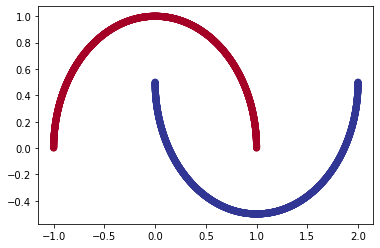

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [9]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2400, 2), (600, 2), (2400,), (600,))

In [12]:
# Build a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.fit(X_train, y_train,
          epochs=15)

Epoch 1/15
75/75 [==============================] - 1s 4ms/step - loss: 0.5616 - accuracy: 0.6742
Epoch 2/15
75/75 [==============================] - 0s 3ms/step - loss: 0.3940 - accuracy: 0.8525
Epoch 3/15
75/75 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8854
Epoch 4/15
75/75 [==============================] - 0s 3ms/step - loss: 0.2100 - accuracy: 0.9108
Epoch 5/15
75/75 [==============================] - 0s 6ms/step - loss: 0.1644 - accuracy: 0.9325
Epoch 6/15
75/75 [==============================] - 0s 6ms/step - loss: 0.1276 - accuracy: 0.9538
Epoch 7/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.9742
Epoch 8/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9821
Epoch 9/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9921
Epoch 10/15
75/75 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9975
Epoch 11/15
75/75 [

In [14]:
# Creating a function to visualize how our model is performing...
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.

  Arguments: 
    model --> the trained model 
    X --> the feature data (numpy array)
    y --> the truth labels 

  Returns:
    A visualization of how our model is performing (fitting with our data)
    
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


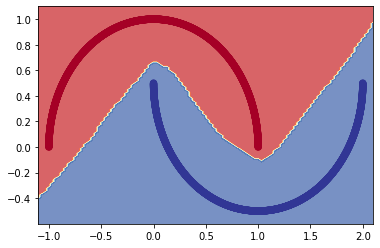

In [15]:
plot_decision_boundary(model , X , y)

# 2. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the classifcation tutorial in the TensorFlow documentation for ideas.

In [17]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

# 3. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [22]:
# Implementing softmax function

def softmax(x):
  x = tf.cast(x, dtype=tf.float32)
  e_x = tf.math.exp(x - tf.math.reduce_max(x))
  return e_x / tf.math.reduce_sum(e_x, axis=0)

In [23]:
# Creating sample tensor 
tensor = tf.constant([[1, 2, 3, 6],
                     [2, 4, 5, 6],
                     [3, 8, 7, 6]] )
tensor

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[1, 2, 3, 6],
       [2, 4, 5, 6],
       [3, 8, 7, 6]], dtype=int32)>

In [24]:
# Applying our softmax function 
softmax(tensor)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0.09003057, 0.00242826, 0.01587624, 0.3333333 ],
       [0.24472849, 0.01794253, 0.11731043, 0.3333333 ],
       [0.66524094, 0.9796292 , 0.8668133 , 0.3333333 ]], dtype=float32)>

# 4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [26]:
# Getting the MNIST data from the keras dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

# Splitting into train and test 
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

# Number of classes and class names
num_classes = 10     # 10 labels/classes

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Checking the shapes of the splits 
train_images.shape , train_labels.shape , test_images.shape , test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
# Building a model 
simple_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compiling
simple_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = simple_model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 2.0796 - accuracy: 0.3748
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9936 - accuracy: 0.6358
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7378 - accuracy: 0.7216
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6577 - accuracy: 0.7420
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6073 - accuracy: 0.7572
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5822 - accuracy: 0.7626
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5510 - accuracy: 0.7744
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5117 - accuracy: 0.8060
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4655 - accuracy: 0.8414
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.43

In [28]:
# Function for the confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [29]:
# Making predictions with our model 
pred_probs = simple_model.predict(test_images)

# Converting our pred probs to predictions 
preds = pred_probs.argmax(axis = 1)

# Viewing the first 10 preds 
preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

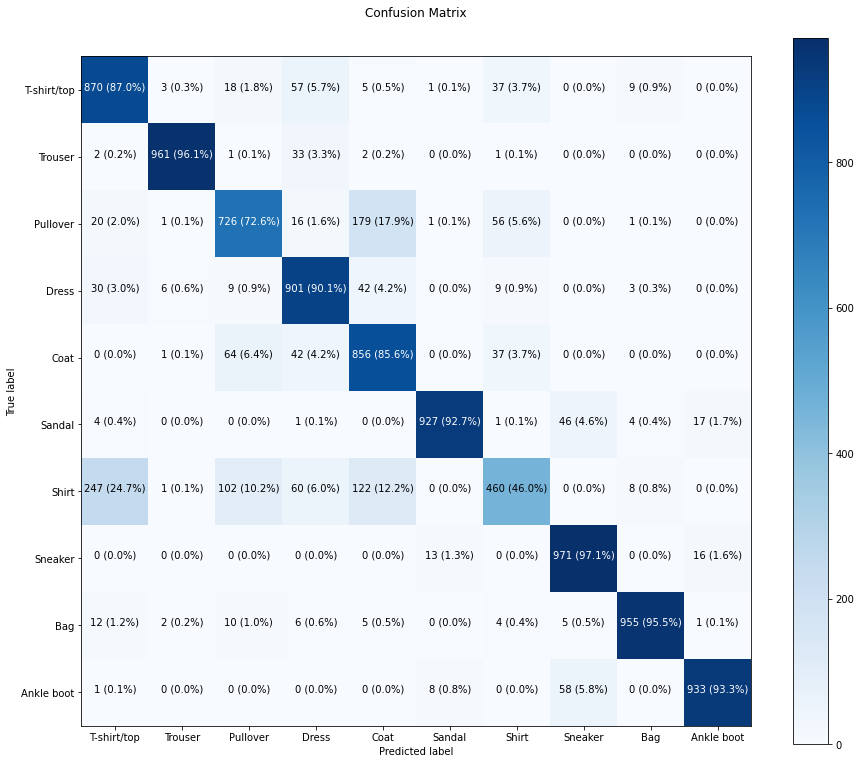

In [30]:
# Plotting the confusion matrix 
make_confusion_matrix(y_true = test_labels , 
                      y_pred = preds , 
                      classes = class_names , 
                      figsize = (15 , 13), 
                      text_size = 10)

# 5. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.


In [31]:
# Making predictions 
preds = simple_model.predict(test_images)

In [32]:
# Below function is from TensorFlow Tutorials (https://www.tensorflow.org/tutorials/keras/classification#verify_predictions)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



def plot_prediction_images():
  num_rows = 5 
  num_cols = 3
  num_images = num_rows * num_cols 
  plt.figure(figsize = (2*2*num_cols , 2*num_rows))
  for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols , 2*i+1)
    plot_image(i , preds[i], test_labels , test_images)
    plt.subplot(num_rows , 2*num_cols , 2*i+2)
    plot_value_array(i , preds[i] ,  test_labels)
  plt.tight_layout()
  plt.show

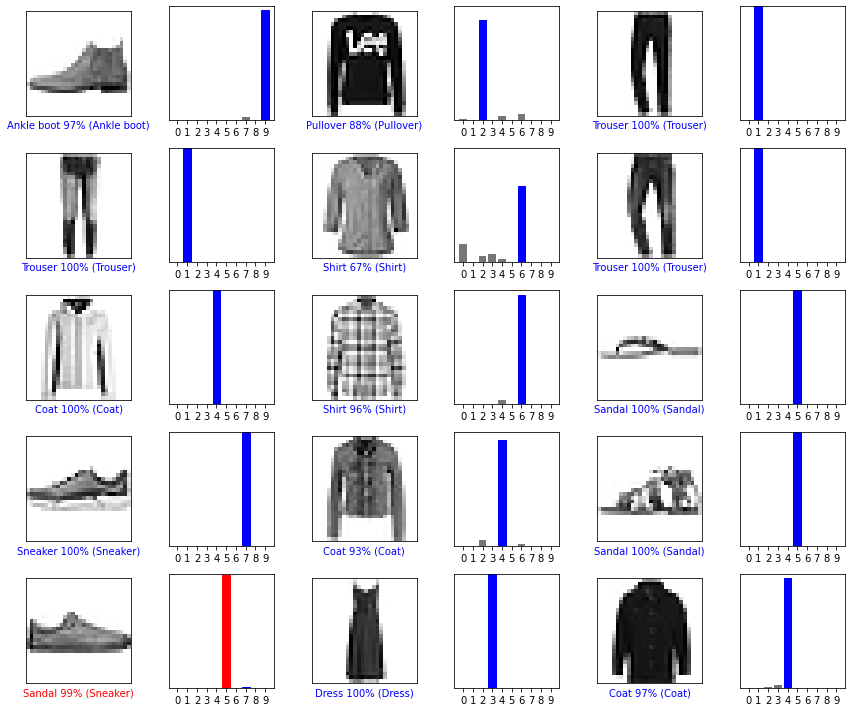

In [33]:
# Using our function
plot_prediction_images()